In [9]:
# Data handling
import pandas as pd
import numpy as np

# Machine learning: model selection, preprocessing, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Machine learning: models
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Machine learning: metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
df = pd.read_csv("NHANES_data_stroke_train.csv")

# Display basic information
print("First few rows of the dataset:")
print(df.head())

print("\nCount of missing values per column:")
print(df.isnull().sum())

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(['stroke'])

# Generate cross terms
df['age_systolic'] = df['Age'] * df['Systolic']
df['age_tchol'] = df['Age'] * df['TCHOL']
df['age_hdl'] = df['Age'] * df['HDL']
df['age_smoker'] = df['Age'] * df['CurrentSmoker']

# Update the lists of numerical and categorical columns after generating cross terms
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(['stroke'])

# Define preprocessing for numerical columns (impute then scale)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Define preprocessing for categorical columns (impute then one-hot encode)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Splitting dataset into training and testing sets
X = df.drop('stroke', axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply transformations
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

First few rows of the dataset:
   SEQN  Income  Sex  Age  Race  Edu  Diastolic    Systolic      Pulse   BMI  \
0  1001    3.50    1   35     3  NaN  71.333333  119.666667  69.666667  41.8   
1  1002    1.30    2   69     3  5.0  67.333333  112.666667  66.000000  31.6   
2  1003    4.00    2   66     1  NaN  59.000000  108.666667  59.666667  30.8   
3  1004    1.05    2   50     4  NaN  66.333333  117.333333  59.333333  30.6   
4  1005    1.99    2   67     2  NaN  66.333333  115.000000  76.000000  23.5   

   HDL  Trig  LDL  TCHOL  kidneys_eGFR  Diabetes  CurrentSmoker  isActive  \
0   35   264   92    165    120.688479       2.0              2       1.0   
1   44   219  257    345     86.488508       2.0              1       1.0   
2   69   102  156    247     68.752710       2.0              2       1.0   
3   76    63   70    160     98.939151       2.0              1       2.0   
4   82    82  176    277     96.766487       2.0              2       2.0   

   isInsured  stroke  
0 

In [3]:
# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_transformed, y_train)


DecisionTreeClassifier(random_state=42)

In [4]:
# SVM
svm_classifier = SVC(probability=True, random_state=42)
svm_classifier.fit(X_train_transformed, y_train)


SVC(probability=True, random_state=42)

In [5]:
# Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_transformed, y_train)


RandomForestClassifier(random_state=42)

In [6]:
# Gradient Boosting
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train_transformed, y_train)


GradientBoostingClassifier(random_state=42)

Decision Tree Performance:
Accuracy: 0.0037
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       783
           1       0.08      0.08      0.08        36
           2       0.00      0.00      0.00         0

    accuracy                           0.00       819
   macro avg       0.03      0.03      0.03       819
weighted avg       0.00      0.00      0.00       819




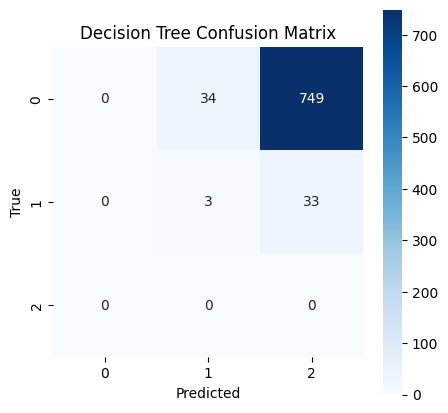

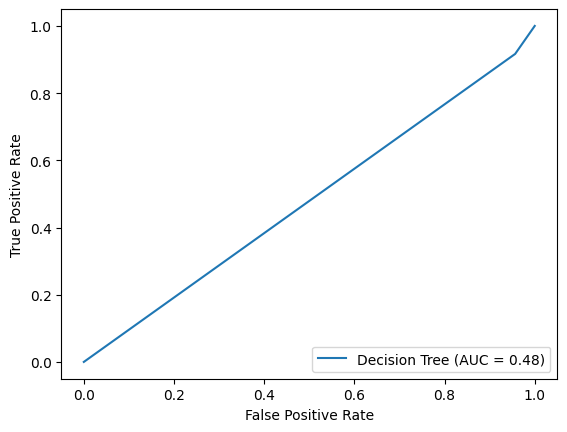

SVM Performance:
Accuracy: 0.0000
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     783.0
           1       0.00      0.00      0.00      36.0
           2       0.00      0.00      0.00       0.0

    accuracy                           0.00     819.0
   macro avg       0.00      0.00      0.00     819.0
weighted avg       0.00      0.00      0.00     819.0




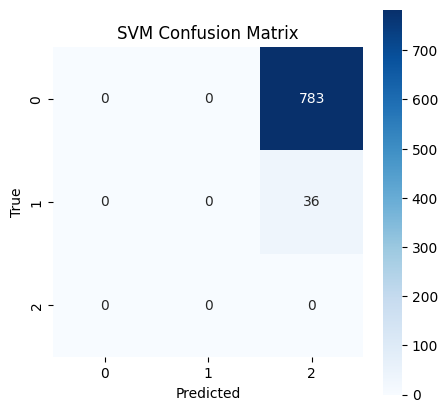

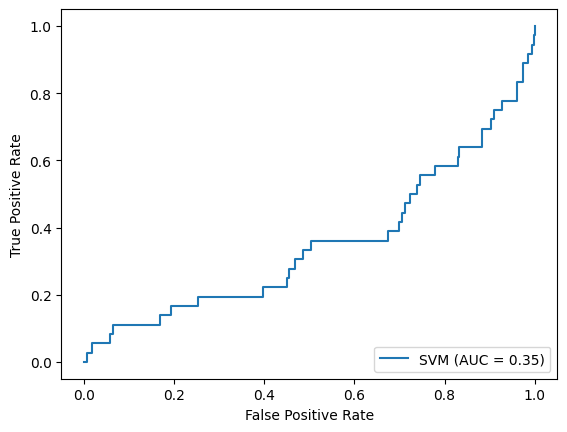

Random Forest Performance:
Accuracy: 0.0000
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     783.0
           1       0.00      0.00      0.00      36.0
           2       0.00      0.00      0.00       0.0

    accuracy                           0.00     819.0
   macro avg       0.00      0.00      0.00     819.0
weighted avg       0.00      0.00      0.00     819.0




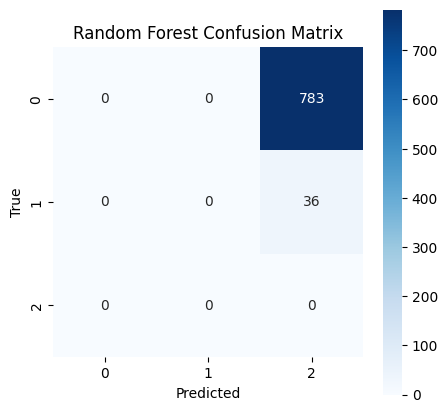

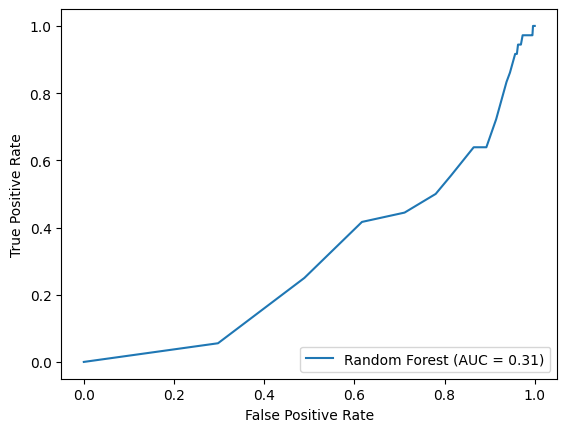

Gradient Boosting Performance:
Accuracy: 0.0000
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     783.0
           1       0.00      0.00      0.00      36.0
           2       0.00      0.00      0.00       0.0

    accuracy                           0.00     819.0
   macro avg       0.00      0.00      0.00     819.0
weighted avg       0.00      0.00      0.00     819.0




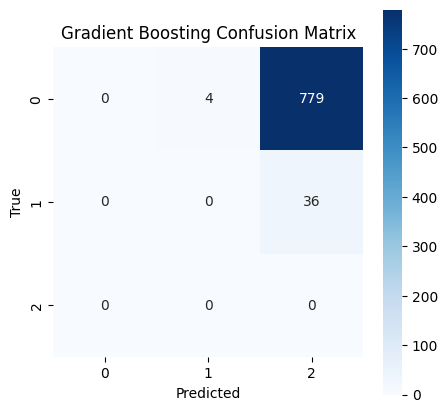

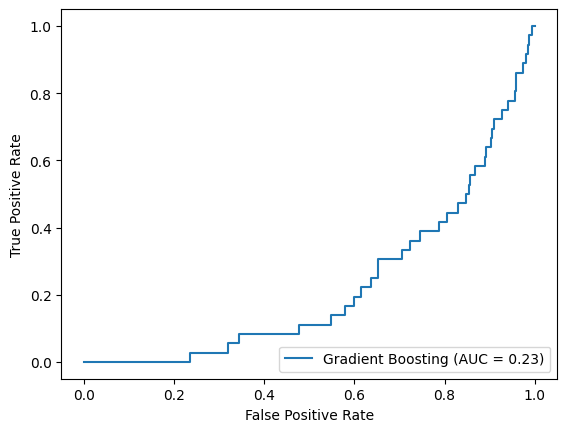

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Function to evaluate models
def evaluate_model(model, model_name, X_test_transformed, y_test_original):
    # Adjust target values to {0, 1}
    y_test = y_test_original.copy()
    y_test[y_test == 2] = 0  # Assuming 2 is the negative class
    
    y_pred = model.predict(X_test_transformed)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Displaying basic evaluation metrics
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred, zero_division=0)}\n")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", square=True)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()
    
    # ROC Curve and AUC
    # This assumes y_test is binary and model supports predict_proba
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_transformed)[:,1]  # Get probabilities for the positive class
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model_name)
        display.plot()
        plt.show()
    else:
        print("ROC curve and AUC are not plotted because the model does not support probability estimates.")

# Evaluate models with the updated function
evaluate_model(dt_classifier, "Decision Tree", X_test_transformed, y_test)
evaluate_model(svm_classifier, "SVM", X_test_transformed, y_test)
evaluate_model(rf_classifier, "Random Forest", X_test_transformed, y_test)
evaluate_model(gb_classifier, "Gradient Boosting", X_test_transformed, y_test)
